# Coulomb logarithms

In [62]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg'] 

In [63]:
import matplotlib.pyplot as plt

from astropy.visualization import quantity_support

from plasmapy.formulary import Coulomb_logarithm, impact_parameter

Coulomb collisions are collisions between two charged particles where the interaction is governed solely by the electric field. Coulomb collisions are occur much more frequently than head-on collisions.  Coulomb collisions usually result in small deflections in particle trajectories. The deflection angle depends on the distance between the two particles.

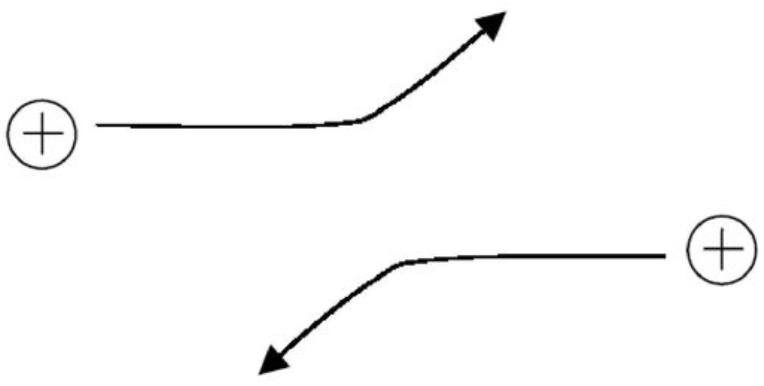

[impact parameters]: https://en.wikipedia.org/wiki/Impact_parameter
[Debye length]: https://en.wikipedia.org/wiki/Debye_length

Coulomb collisions in a plasma occur at a range of [impact parameters].  The minimum and maximum impact parameters ($b_\min$ and $b_\max$, respectively) represent the range of distances of closest approach. While a typical Coulomb collision results in only a slight change in trajectory, the effects of these collisions are cumulative, and it is necessary to integrate over the range of impact parameters. The Coulomb logarithm accounts for the range in impact parameters, and is given by $$\ln{Λ} ≡ \ln\left(\frac{b_\max}{b_\min}\right).$$ 
But what should we use for the impact parameters?

Usually $b_\max$ is given by the [Debye length], $λ_D$. On length scales $≳ λ_D$, electric fields from individual particles get cancelled out due to screening effects. Consequently, Coulomb collisions with impact parameters $≳ λ_D$ will rarely occur. 

The inner impact parameter $b_\min$ is more controversial. One possibility would be to set $b_\min$ to be the impact parameter corresponding to a 90° deflection angle, $ρ_⟂$, which can be calculated with `impact_parameter_perp`.  Alternatively, $b_\min$ could be set to be the de Broglie wavelength, $λ_{dB}$, which can be calculated with `deBroglie_wavelength`. Typically, $$b_\min = \max\left\{ρ_⟂, λ_{dB} \right\}.$$

The `impact_parameter` function in `plasmapy.formulary` simultaneously calculates both $b_\min$ and $b_\max$. Let's estimate $b_\min$ and $b_\max$ for proton-electron collisions in the solar corona.

In [141]:
solar_corona = {
    "T": 1e6 * u.K,
    "n_e": 1e15 * u.m ** -3,
    "species": ["e-", "p+"],
}

bmin, bmax = impact_parameter(**solar_corona)

print(f"{bmin = :.2e}")
print(f"{bmax = :.2e}")

bmin = 1.05e-11 m
bmax = 2.18e-03 m


When we can calculate the Coulomb logarithm, we find that it is ∼20 (a common value for astrophysical plasma).

In [139]:
Coulomb_logarithm(**solar_corona)

19.150697742645406

Our next goal is to visualize the Coulomb logarithm.  Let's start by creating a function to plot $\ln{Λ}$ and $b$.  To get a "Λ" in a Jupyter notebook, type `\Lambda` and press tab.

In [127]:
def plot_coulomb(**kwargs):
    """Plot the Coulomb logarithm."""

    bmin, bmax = impact_parameter(**kwargs)
    ln_Λ = Coulomb_logarithm(**kwargs)

    with quantity_support():

        fig, axes = plt.subplots(nrows=1, ncols=2)

        fig.set_size_inches(10, 4)

        axes[0].semilogx(T, ln_Λ)
        axes[0].set_xlabel("T (K)")
        axes[0].set_ylabel("$\ln{Λ}$")
        axes[0].set_title("Coulomb logarithm")

        axes[1].loglog(T, bmin, label="$B_\mathrm{min}$")
        axes[1].loglog(T, bmax, label="$B_\mathrm{min}$")
        axes[1].set_xlabel("T (K)")
        axes[1].set_ylabel("b (m)")
        axes[1].set_title("Impact parameters")
        axes[1].legend()

        fig.tight_layout()

Let's calculate the Coulomb logarithm and minimum/maximum impact parameters over a range of temperatures in a high density plasma.

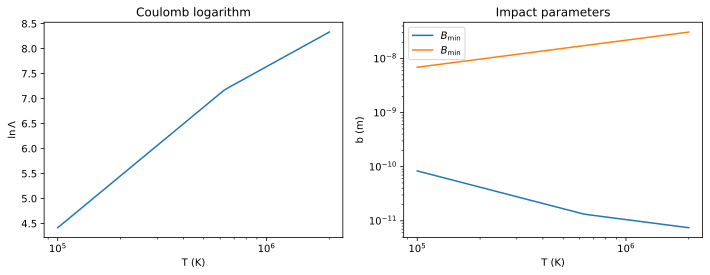

In [144]:
n_e = 1e25 * u.m ** -3

dense_plasma = {
    "T": np.geomspace(1e5, 2e6) * u.K,
    "n_e": n_e,
    "species": ["e-", "p+"],
}

plot_coulomb(**dense_plasma)

At low temperatures, $b_\min$ is $ρ_⟂$. At higher temperatures, $b_\min$ is $λ_{dB}$. What happens if we look at lower temperatures?

/home/namurphy/Projects/PlasmaPy/plasmapy/formulary/collisions.py:521: CouplingWarning: The Coulomb logarithm is [-5.947677   -5.78548361 -5.62329023 -5.46109684 -5.29890345 -5.13671006
 -4.97451667 -4.81232328 -4.65012989 -4.4879365  -4.32574312 -4.16354973
 -4.00135634 -3.83916295 -3.67696956 -3.51477617 -3.35258278 -3.19038939
 -3.02819601 -2.86600262 -2.70380923 -2.54161584 -2.37942245 -2.21722906
 -2.05503567 -1.89284228 -1.7306489  -1.56845551 -1.40626212 -1.24406873
 -1.08187534 -0.91968195 -0.75748856 -0.59529517 -0.43310179 -0.2709084
 -0.10871501  0.05347838  0.21567177  0.37786516  0.54005855  0.70225194
  0.86444533  1.02663871  1.1888321   1.35102549  1.51321888  1.67541227
  1.83760566  1.99979905], and the specified method, "classical", depends on weak coupling.
  warnings.warn(


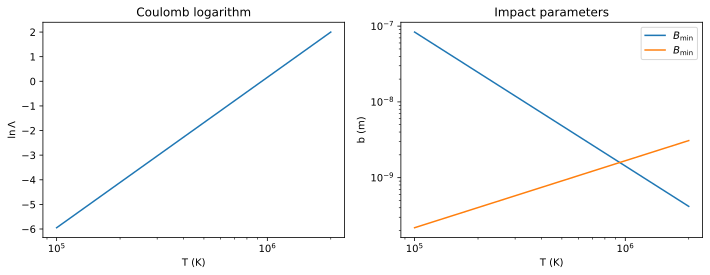

In [147]:
cool_dense_plasma = {
    "T": np.geomspace(1e2, 2e4) * u.K,
    "n_e": n_e,
    "species": ["e-", "p+"],
}

plot_coulomb(**cool_dense_plasma)

The Coulomb logarithm becomes negative! 🙀  This unphysical situation occurs because $b_\min > b_\max$ at low temperatures.

So how to we handle this?  Fortunately, PlasmaPy's implementation of `Coulomb_logarithm` includes the methods described by Gericke, Murillo, and Schlanges (2002) for dense, strongly-coupled plasmas.  For most cases, we recommend using `method="GMS-6"`.

/home/namurphy/Projects/PlasmaPy/plasmapy/formulary/collisions.py:527: CouplingWarning: The Coulomb logarithm is [5.96814188e-04 7.41261191e-04 9.20702661e-04 1.14362429e-03
 1.42056952e-03 1.76463707e-03 2.19209724e-03 2.72315447e-03
 3.38288916e-03 4.20241824e-03 5.22032094e-03 6.48438372e-03
 8.05372479e-03 1.00013638e-02 1.24173032e-02 1.54121820e-02
 1.91215422e-02 2.37107122e-02 2.93802420e-02 3.63717175e-02
 4.49736182e-02 5.55266607e-02 6.84277829e-02 8.41316051e-02
 1.03147904e-01 1.26033478e-01 1.53376916e-01 1.85775413e-01
 2.23803975e-01 2.67979145e-01 3.18721309e-01 3.76321149e-01
 4.40916114e-01 5.12481465e-01 5.90837662e-01 6.75672508e-01
 7.66573605e-01 8.63065263e-01 9.64644246e-01 1.07081017e+00
 1.18108833e+00 1.29504450e+00 1.41229255e+00 1.53249637e+00
 1.65536775e+00 1.78066168e+00 1.90817037e+00 2.03771678e+00
 2.16914841e+00 2.30233151e+00], so strong coupling effects may exist for the plasma.
  warnings.warn(


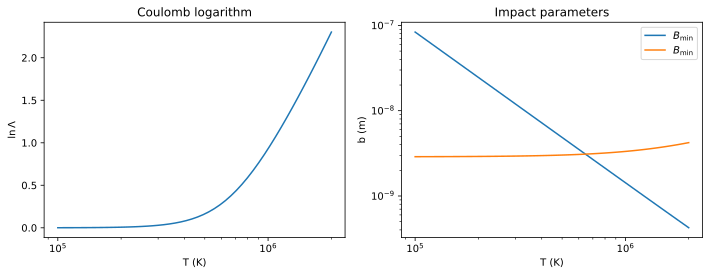

In [150]:
cool_dense_plasma["z_mean"] = 1
cool_dense_plasma["method"] = "GMS-6"

plot_coulomb(**cool_dense_plasma)

In the above plot, the Coulomb logarithm approaches zero as the temperature decreases, and does not become unphysically negative.